# Iteration 1 
#### Author(s): Furqan Shiraz Khan (202035549), Saad Equbal Syed (202046116)####

In this project we are using an Airbnb Amsterdam dataset that can be found here: https://www.kaggle.com/datasets/erikbruin/airbnb-amsterdam?select=listings.csv

The dataset has **16** variables.

## 1. Dateset Presentation
### Variable Descriptions:

1. **id**: id of the unit. 
*Uniquely identifies each row in the dataset*

2. **name**: name of the listed unit

3. **host_id**: id of the host of each unit. 
*Used to uniquely identify hosts.*

4. **host_name**: name of the host. 
*Can help us Identify if the host is an individual or a cooperation.*

5. **neighbourhood_group**: the area of amsterdam the unit is located in.

6. **neighbourhood**: the neighbourhood the unit is located in. 
*Identify which areas are popular for renting.*

7. **latitude**: the latitide of the unit. 
*Provides an exact location for the unit when used with longitude.*

8. **longitude**: the longitude of the unit. 

9. **room_type**: the type of room, for example could be private room or a house. 
*Can help identify which type of room is preferred.*

10. **price**: the price of the unit. 
*One of the most important variable, helps see many trends such as how price varies with which area a unit is located in.* 

11. **minimum_nights**: minimum amount of nights the guest has to stay. 

12. **number_of_reviews**: total number of reviews. 
*Can tell us how reliable a rating is.*

13. **last_review**: date of the last review posted.

14. **reviews_per_month**: number of reviews a unit gets monthly. 

15. **calculated_host_listings_count**: number of units a host has listed. 

16. **availability_365**: total number of days a listing is available during a year. 
*Can tell us how often a unit is available.*
 


### Variables to be used


* id is kept as it helps us identify each listing
* name is kept to provide some information about the listing
* host_name and host_id are also kept to identify the host and to make relationships with hosts (ex: which hosts are better)
* neighbourhood_group will be **removed** as it appears to be empty.
* neighbourhood is important as it will allow us to make relationships with location (ex: which location has the most units, etc)
* latitude and logitude is kept if we need to make graphs with location or for example, calculate how far a unit is from a popular tourist spot.
* room_type is important to distinguish between privates room, houses, apartments, etc. 
* price is kept as many trends can be formulated with it. (ex. expensive neighbourhoods or cheapest unit)
* minimum_nights is important as some units can only be rented for long-term, while others are short-term.
* number_of_reviews, reviews_per_month and last_review are kept to see if the unit has reliable ratings.
* calculated_host_listings_count will be **removed** as it doesn't offer much analysis.
* availability_365 will be kept as it tells us how often a unit is available and we can make useful relationships.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
df = pd.read_csv("listings.csv", index_col=["id"]).sort_values("id")
#removing columns that are not needed
del df["neighbourhood_group"]
del df["calculated_host_listings_count"]
df.head(5)

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
id,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,44
3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,47
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,198
25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,141
27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,199


### Descriptors of Variables 

From the table we can minimum_nights and reviews_per_month have similar mean and median. Mean and median of price is slightly different. But with number_of_reviews the mean and median are *drastically different*, this tell us that maybe there might be outliers present.

In [4]:
stats = ["mean", "median", "std", "var"]
df.agg({"price":stats, "minimum_nights": stats, "number_of_reviews":stats, "reviews_per_month":stats})

,price,minimum_nights,number_of_reviews,reviews_per_month
mean,152.181178,3.328707,21.560459,1.062080
median,125.000000,2.000000,8.000000,0.620000
std,145.828976,12.537419,43.240292,1.333320
var,21266.090344,157.186869,1869.722816,1.777742


From the graphs it is clear that none of the variables have a normal distribution. There are no negative values for any of the variables either. Most of data is cluttered near 0. number_of_reviews and reviews_per_month have a *similar patterns* and they might have an **exponential distribution.** With price and minimum_nights it is hard to tell what the distribution is.

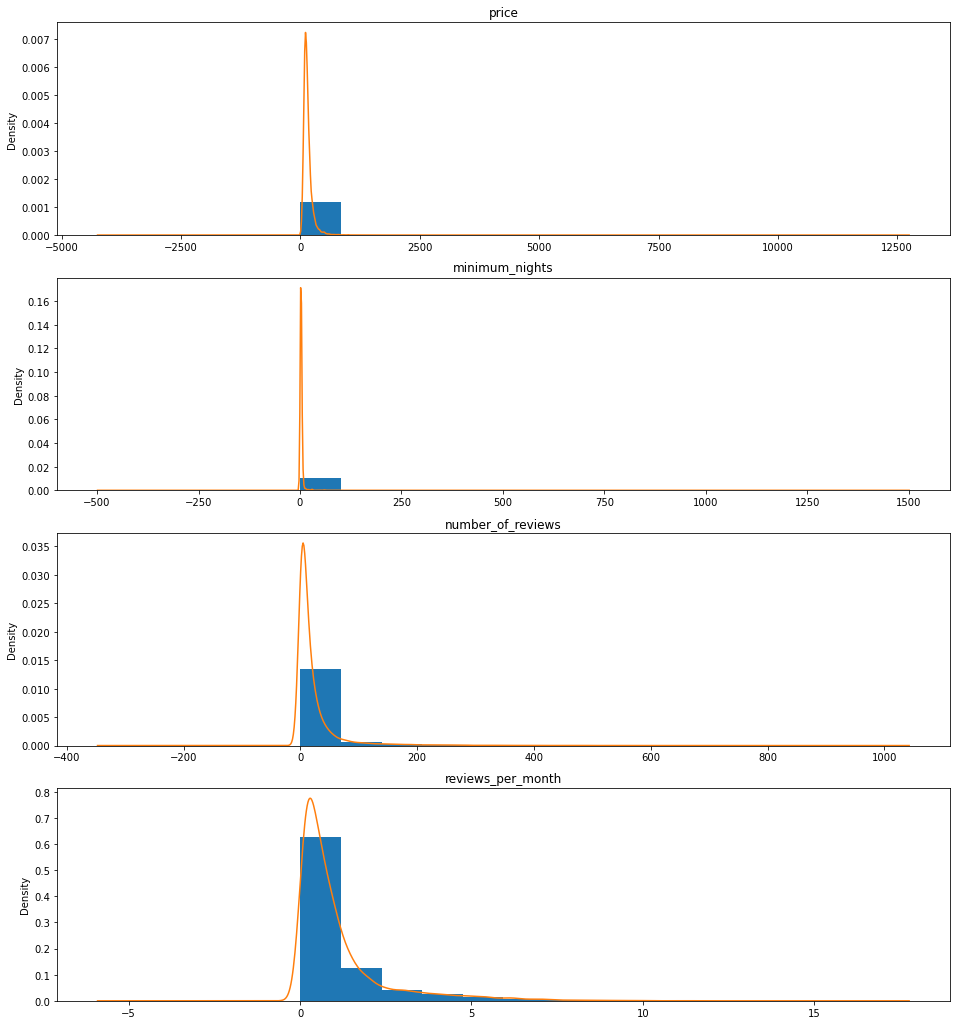

In [5]:
val_cols_names = ['price','minimum_nights','number_of_reviews','reviews_per_month']
def plot_histograms_density(ndf, columns):
    fig, axs = plt.subplots(len(columns),1,figsize=(16,18))
    i = 0
    for c in columns:
        ndf[c].hist(ax=axs[i], density=True) # normalizes the density
        ndf[c].plot.density(ax=axs[i], title=c)
        i+=1
plot_histograms_density(df, val_cols_names)

From the boxplots it seems like there are many outliers, but from the the histogram above we know that none of the variables have a normal distribution and they are not outliers! So this behavior is normal. Most of the data is cluttered past the Upper Whisker.

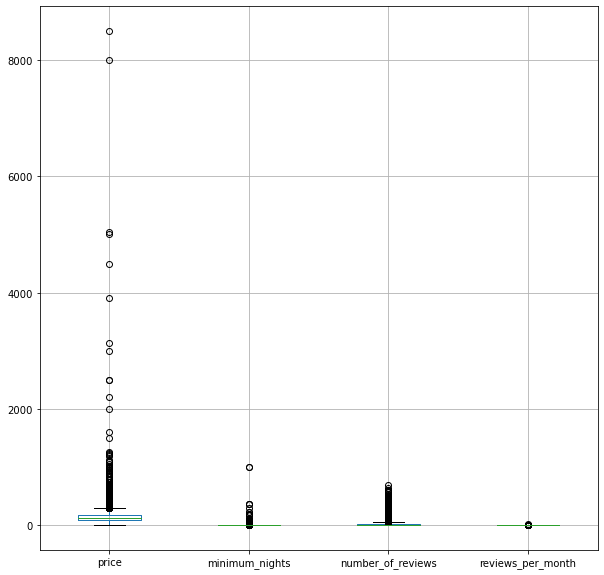

In [6]:
df.boxplot(column = val_cols_names, figsize= (10,10) )
plt.show()

## 2. Data Cleaning
### Dealing with missing values

We can see that there some missing values in the column, **name** and **host_name**. There are a lot of missing data in **last_review** and **reviews_per_month**.  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               19992 non-null  object 
 1   host_id            20030 non-null  int64  
 2   host_name          20026 non-null  object 
 3   neighbourhood      20030 non-null  object 
 4   latitude           20030 non-null  float64
 5   longitude          20030 non-null  float64
 6   room_type          20030 non-null  object 
 7   price              20030 non-null  int64  
 8   minimum_nights     20030 non-null  int64  
 9   number_of_reviews  20030 non-null  int64  
 10  last_review        17624 non-null  object 
 11  reviews_per_month  17624 non-null  float64
 12  availability_365   20030 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


We used *placeholder values* for name and host_name, as not many values were missing.
We dropped all rows with missing values in columns, **last_review** and **reviews_per_month**.

In [8]:
#replace missing values with empty
df["name"].fillna("Empty", inplace=True)
df["host_name"].fillna("Empty", inplace=True)

df_copy = df.copy() #making a copy
df.dropna(inplace=True) #it will remove rows with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17624 entries, 2818 to 30550093
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               17624 non-null  object 
 1   host_id            17624 non-null  int64  
 2   host_name          17624 non-null  object 
 3   neighbourhood      17624 non-null  object 
 4   latitude           17624 non-null  float64
 5   longitude          17624 non-null  float64
 6   room_type          17624 non-null  object 
 7   price              17624 non-null  int64  
 8   minimum_nights     17624 non-null  int64  
 9   number_of_reviews  17624 non-null  int64  
 10  last_review        17624 non-null  object 
 11  reviews_per_month  17624 non-null  float64
 12  availability_365   17624 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.9+ MB


### Dealing with Outliers

Any value outside of 3 standard deviation of the mean, will be replaced by max or min depending on where the outlier is located.

In [9]:
def replace_outliers_3times_std(df, columns):
    for c in columns:
        high_lim = df[c].mean() + 3*df[c].std()
        low_lim = df[c].mean() - 3*df[c].std()
        print(f"High ({c}):", high_lim)
        print(f"Low ({c}):", low_lim)
        df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c]))

df_c = df.copy()        
replace_outliers_3times_std(df_c, val_cols_names)

High (price): 562.0512663503611
Low (price): -264.7074170539471
High (minimum_nights): 40.43612792205608
Low (minimum_nights): -34.09023595655449
High (number_of_reviews): 160.4302746883723
Low (number_of_reviews): -111.426643276661
High (reviews_per_month): 5.062040383427149
Low (reviews_per_month): -2.9378801473853904


Only max values changed, which tells us that the outliers are on the positive side.
number_of_reviews's mean and std are closer after the removal of the outliers.

In [10]:
df[val_cols_names].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,17624.000000,17624.000000,17624.000000,17624.00000
mean,148.671925,3.172946,24.501816,1.06208
std,137.793114,12.421061,45.309486,1.33332
min,0.000000,1.000000,1.000000,0.01000
25%,96.000000,2.000000,4.000000,0.27000
50%,125.000000,2.000000,11.000000,0.62000
75%,175.000000,3.000000,25.000000,1.23000
max,8500.000000,1001.000000,695.000000,11.85000


In [11]:
df_c[val_cols_names].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month
count,17624.000000,17624.000000,17624.000000,17624.000000
mean,145.737613,2.917286,22.315210,1.023406
std,79.909336,3.185315,32.408231,1.169547
min,0.000000,1.000000,1.000000,0.010000
25%,96.000000,2.000000,4.000000,0.270000
50%,125.000000,2.000000,11.000000,0.620000
75%,175.000000,3.000000,25.000000,1.230000
max,562.051266,40.436128,160.430275,5.062040


In [12]:
df_c

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
id,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59.0,3.0,160.430275,2018-11-28,2.10,44
3209,"Quiet apt near center, great view",3806,Maartje,Westerpark,52.390225,4.873924,Entire home/apt,160.0,4.0,42.000000,2018-08-29,1.03,47
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,Centrum-Oost,52.365087,4.893541,Entire home/apt,80.0,1.0,160.430275,2018-11-30,2.18,198
25428,Lovely apt in City Centre (Jordaan),56142,Joan,Centrum-West,52.373114,4.883668,Entire home/apt,125.0,14.0,1.000000,2018-01-21,0.09,141
27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,Centrum-West,52.386727,4.892078,Private room,150.0,2.0,160.430275,2018-11-25,2.03,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435529,Amsterdam,41867658,Tamara,De Baarsjes - Oud-West,52.365680,4.878104,Entire home/apt,85.0,2.0,1.000000,2018-12-04,1.00,45
30439111,Cozy Studio,204129335,Eleanna,Oud-Noord,52.405705,4.891644,Entire home/apt,65.0,3.0,1.000000,2018-12-02,1.00,9
30518120,1 Bedroom Apartment with Private Rooftop,13804495,Valentina,Bos en Lommer,52.375726,4.851131,Entire home/apt,40.0,1.0,1.000000,2018-12-04,1.00,155
